Plotting Record Temperatures in 2015 Ann Arbor, MI

In this example, I cleaned, analyized, and plotting temperature data to show days in 2015 that had record high or low temperature.

The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    
    
    #return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

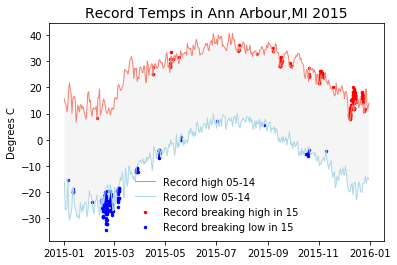

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

#reading data
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
#fix degrees that were originally in 10ths
data['Data_Value']=data['Data_Value']/10
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
#remove leaps
data['Month_Day'] = data['Date'].dt.strftime('%m-%d')
data = data[data['Month_Day']!='02-29']

#max and min by day
max_t = data[(data.Year >=2005) & (data.Year < 2015) & (data['Element']=='TMAX')].groupby(['Month_Day'])['Data_Value'].max()
min_t =data[(data.Year >= 2005) & (data.Year <2015) & (data['Element']=='TMIN')].groupby(['Month_Day'])['Data_Value'].min()

#record breaking
data = data.merge(max_t.reset_index(drop=False).rename(columns ={'Data_Value':'Max'}), on='Month_Day', how ='left')
data = data.merge(min_t.reset_index(drop=False).rename(columns ={'Data_Value':'Min'}), on='Month_Day', how ='left')

#determining what record high or low temps
record_high = data[(data.Year==2015) &(data.Data_Value > data.Max)]
record_low =data[(data.Year==2015)&(data.Data_Value <data.Min)]

# X Axis spanning 2015 only:
date_index = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

#ploting
plt.figure()

#plotting highs and lows records
plt.plot(date_index,max_t,color='salmon', linewidth=1) # Max in red.
plt.plot(date_index,min_t,color='lightblue', linewidth=1) # Min in blue.

#plotting new high and lows in 2015 as dots
plt.scatter(record_high.Date.values, record_high.Data_Value.values, color='red', s=6)
plt.scatter(record_low.Date.values, record_low.Data_Value.values, color='blue', s=6)

#label axis
plt.ylabel('Degrees C')
plt.title('Record Temps in Ann Arbour,MI 2015', fontsize =14)

#fill
plt.fill_between(date_index,max_t, min_t, facecolor='silver', alpha=0.15)

#legend
plt.legend(['Record high 05-14','Record low 05-14','Record breaking high in 15','Record breaking low in 15'],frameon=False)

